In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../../../DataSets/GOOGL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


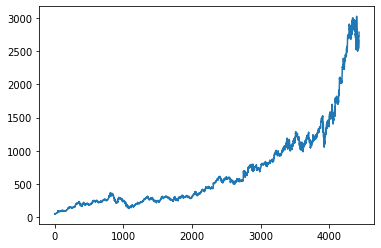

In [4]:
plt.plot(df['Open'])

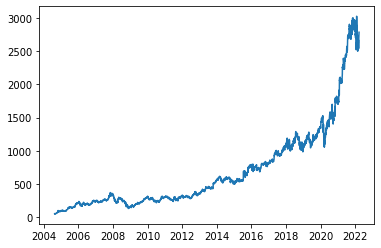

In [5]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

In [6]:
# price= df[['Open']]
# price

In [7]:
price= df[['Open']]

In [8]:
from sklearn.preprocessing import MinMaxScaler 

In [9]:
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(price)

In [10]:
price_scaled.shape

(4431, 1)

In [11]:
X= []
for i in range(4371):
    row= price_scaled[i:i+61,0]
    X.append(row)
X= np.array(X)
X.shape
    

(4371, 61)

In [12]:
X_train= X[:,:-1]
X_train.shape

(4371, 60)

In [13]:
y_train= X[:,-1]
y_train.shape

(4371,)

In [14]:
X_train= X_train.reshape(4371,60,1)

# Model Building- LSTM

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [16]:
model_LSTM= Sequential()
model_LSTM.add(LSTM(99, return_sequences= True, input_shape=(60,1)))
model_LSTM.add(LSTM(99, return_sequences= True))
model_LSTM.add(LSTM(99, return_sequences= True))
model_LSTM.add(LSTM(99, return_sequences= False))

model_LSTM.add(Dense(1))

model_LSTM.compile(loss='mean_squared_error')



In [17]:
model_LSTM.fit(X_train,y_train, epochs=5, batch_size= 64)

Epoch 1/5
69/69 [==============================] - 52s 435ms/step - loss: 0.0155
Epoch 2/5
69/69 [==============================] - 28s 404ms/step - loss: 0.0037
Epoch 3/5
69/69 [==============================] - 28s 409ms/step - loss: 0.0028
Epoch 4/5
69/69 [==============================] - 28s 412ms/step - loss: 0.0020
Epoch 5/5
69/69 [==============================] - 32s 461ms/step - loss: 0.0014


In [18]:
# Basic